In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Simulation sous python

In [54]:
def realize(n):
    '''
    On initialise le tableau qui contient les différentes réalisations {y1, y2, ..., yn} des n variables {Y1, Y2, ..., Yn}
    On distribue selon une loi du khi-deux chaque variable Yi et on le met dans le tableau y
    '''
    y=(np.random.chisquare(2, n))
    return y

### 2. Calcul d'une réalisation de la moyenne empirique

In [55]:
def moy_Emp(n):
    '''
    On calcule la moyenne empirique pour chaque réalisation avec un échantillon n
    '''
    return (n**-1)*np.sum(realize(n))

### 3. Calcul d'une réalisation de la variable transformée

In [56]:
def transform(n):
    return np.sqrt(n)*((moy_Emp(n)-2)/2)

### 4. Répeter 5000 fois les étapes 1, 2 et 3

In [57]:
def repeter(N,n):
    '''
    On répète N fois les fonctions realize, moy_Emp & transform
    NB: Ici on appelle uniquement la fonction transform, qui, à son tour appelle la fonction moy_Emp et qui, elle aussi appelle la fonction realize.
    Donc toutes les 3 sont appelées et ici N fois (5000 fois par exemple)
    '''
    zbarre=[]
    for i in range(N):
        Z=transform(n)
        zbarre.append(Z)
    return zbarre

### 5. Construire un histogramme de ces 5000 réalisations

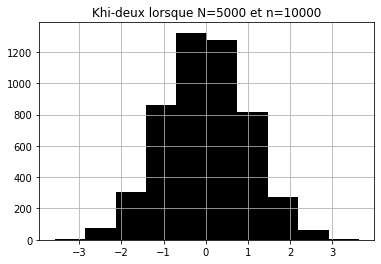

In [69]:
def hist(N, n):
    v=repeter(N, n)
    plt.hist(v, color='black')
    plt.title('Khi-deux lorsque N='+str(N)+' et n='+str(n))
    plt.grid()
    #plt.show()
hist(N=5000, n=10000)

### Comparaison histogramme avec densité de loi normale centrée éduite

In [70]:
def normal(x, mu=0, sigma=1):
    return (math.exp(-((x-mu)**2)/(2*(sigma**2))))
abs=np.linspace(-4,4,10000)
y=[normal(x) for x in abs]

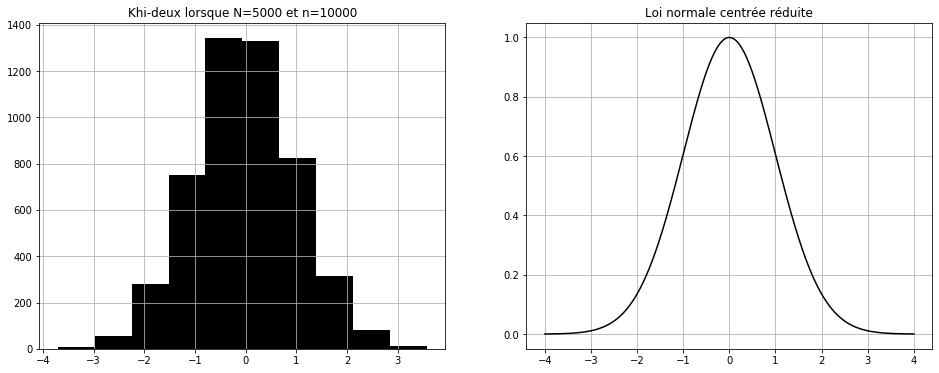

In [72]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
hist(N=5000, n=10000)
plt.subplot(1,2,2)
plt.plot(abs,y, color='black')
plt.grid()
plt.title("Loi normale centrée réduite")
plt.show()

#### la somme de variables aléatoires identiques et indépendantes suivant une loi du khi-deux tend vers une loi normale centrée réduite (TCL)